In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/project/dataset.csv")

In [3]:
df.head(3)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

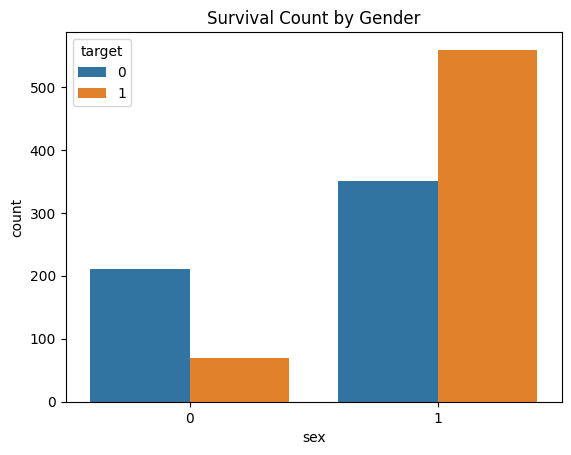

In [7]:
sns.countplot(x='sex', hue='target', data=df)
plt.title('Survival Count by Gender')
plt.show()

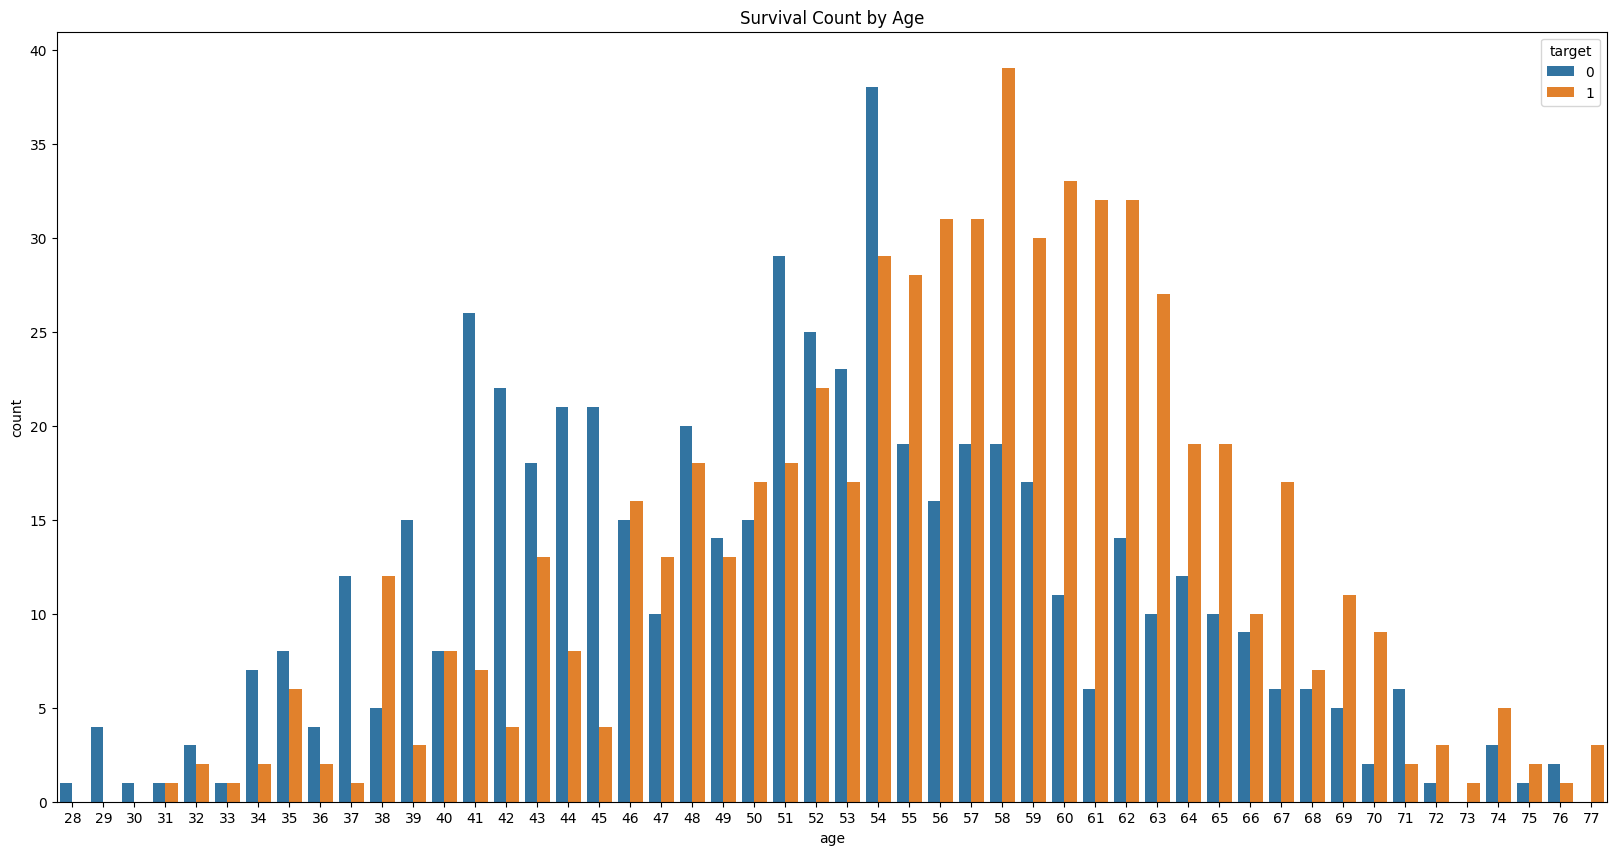

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(x='age', hue='target', data=df)
plt.title('Survival Count by Age')
plt.show()

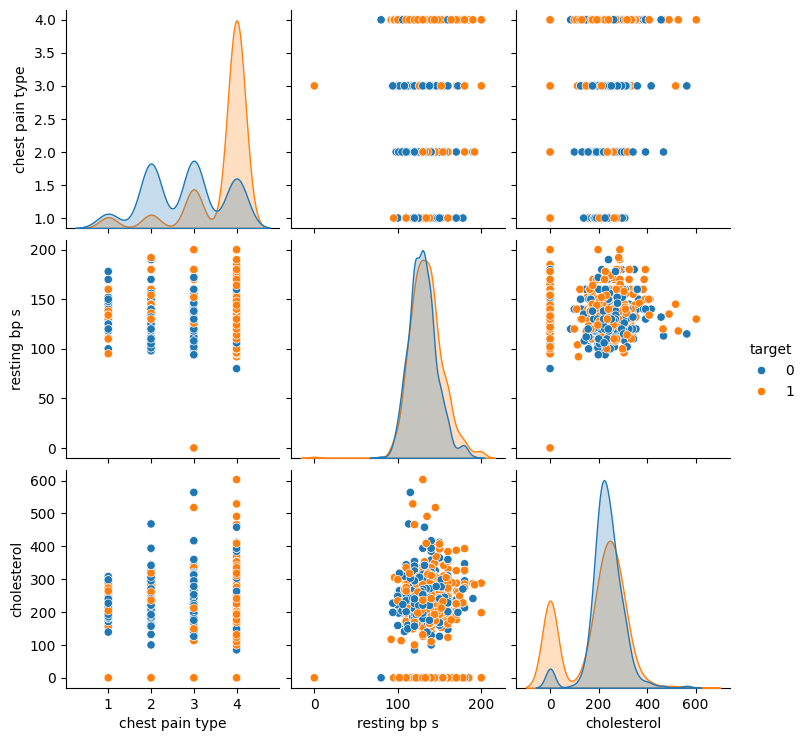

In [9]:
sns.pairplot(df, hue='target', vars=['chest pain type', 'resting bp s', 'cholesterol'])
plt.show()

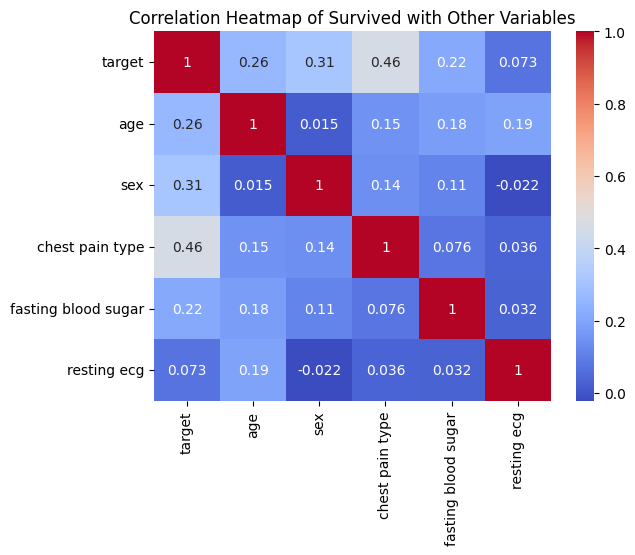

In [10]:
corr_matrix = df[['target', 'age', 'sex', 'chest pain type', 'fasting blood sugar', 'resting ecg']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Survived with Other Variables')
plt.show()

Model Import

In [11]:
pip install scikit-learn==1.5.2

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
import sklearn
print(sklearn.__version__)

1.5.2


In [15]:
# Select the features
features = df.drop('target', axis=1).columns.tolist()

# Select the target column
target = 'target'

# Extract features (X) and target (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values (optional, but recommended for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Predicting with Linear Regression

In [16]:
# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lin_reg.predict(X_test)

# Convert the continuous predictions into binary outcomes
y_pred_lr_binary = np.round(y_pred_lr)

# Evaluate the model (Accuracy score)
lr_accuracy = accuracy_score(y_test, y_pred_lr_binary)
print(f'Linear Regression Accuracy: {lr_accuracy:.4f}')


Linear Regression Accuracy: 0.8529


Linear Regression Accuracy: 0.8529


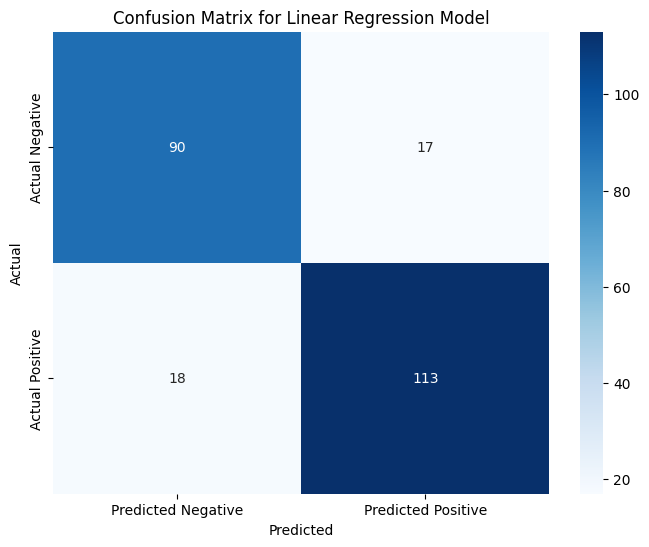

In [17]:
# Evaluate the model (Accuracy score)
lr_accuracy = accuracy_score(y_test, y_pred_lr_binary)
print(f'Linear Regression Accuracy: {lr_accuracy:.4f}')

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_lr_binary)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Linear Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Predicting with Naive Bayes

In [18]:
# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on test data
y_pred_nb = nb.predict(X_test)

# Evaluate the model (Accuracy score)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {nb_accuracy:.4f}')


Naive Bayes Accuracy: 0.8571


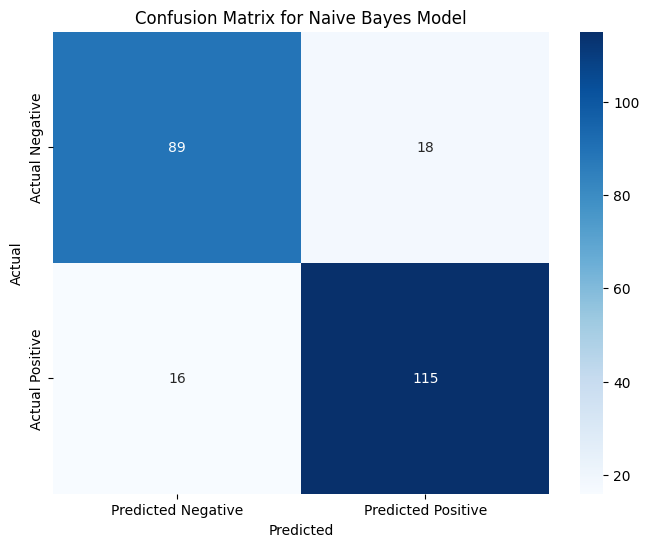

In [19]:
cm = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Naive Bayes Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Evaluate the model (Accuracy score)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')


Random Forest Accuracy: 0.9454


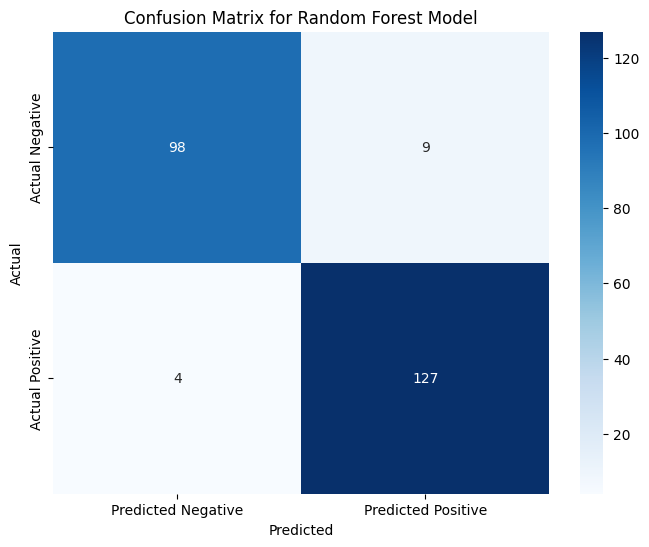

In [21]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on training and test data
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Evaluate the model (Accuracy score)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Random Forest Training Accuracy: {train_accuracy:.4f}')
print(f'Random Forest Test Accuracy: {test_accuracy:.4f}')

# Check for overfitting
if train_accuracy > test_accuracy:
    print("The model might be overfitting, as the training accuracy is significantly higher than the test accuracy.")
else:
    print("The model is performing well on both training and test data.")


Random Forest Training Accuracy: 1.0000
Random Forest Test Accuracy: 0.9454
The model might be overfitting, as the training accuracy is significantly higher than the test accuracy.


In [23]:
# Train K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test)

# Evaluate the model (Accuracy score)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {knn_accuracy:.4f}')


K-Nearest Neighbors Accuracy: 0.7185


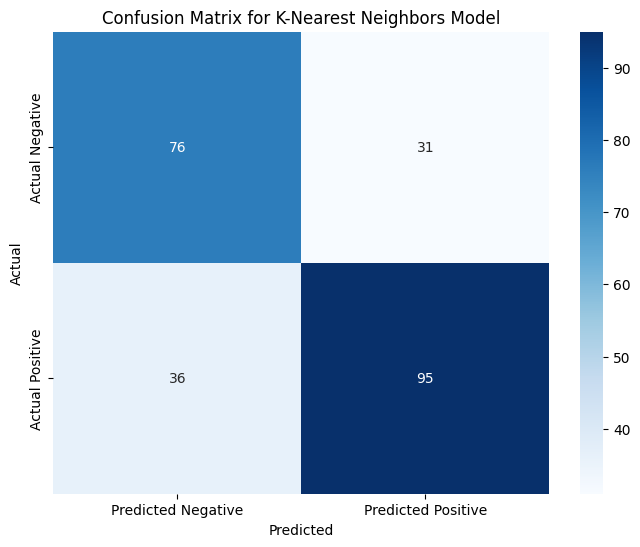

In [24]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for K-Nearest Neighbors Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
# Print all accuracies
print(f'Linear Regression Accuracy: {lr_accuracy:.4f}')
print(f'Naive Bayes Accuracy: {nb_accuracy:.4f}')
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')
print(f'K-Nearest Neighbors Accuracy: {knn_accuracy:.4f}')


Linear Regression Accuracy: 0.8529
Naive Bayes Accuracy: 0.8571
Random Forest Accuracy: 0.9454
K-Nearest Neighbors Accuracy: 0.7185


In [26]:
import joblib

# Assuming your trained model is in a variable called 'model'
joblib.dump(rf, 'heart_disease_model2.pkl')


['heart_disease_model2.pkl']